In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/raw/energy_data.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.set_index('timestamp')


In [2]:
df['hour'] = df.index.hour


In [4]:
#hourly usage of appliance table
appliances = ['fridge','ac','lights','microwave']

hourly_usage = df.groupby('hour')[appliances].mean()

hourly_usage


,fridge,ac,lights,microwave
hour,,,,
0,83.320442,730.453039,53.458564,96.955801
1,83.635359,795.823204,54.712707,137.171271
2,83.314917,728.005525,52.464088,113.193370
3,87.160221,797.812155,54.303867,116.552486
4,95.243094,805.795580,55.602210,93.364641
5,99.988950,786.138122,53.276243,126.187845
6,90.060773,703.220994,53.215470,87.839779
7,88.823204,710.375691,7.287293,52.668508
8,90.143646,755.276243,8.005525,71.718232


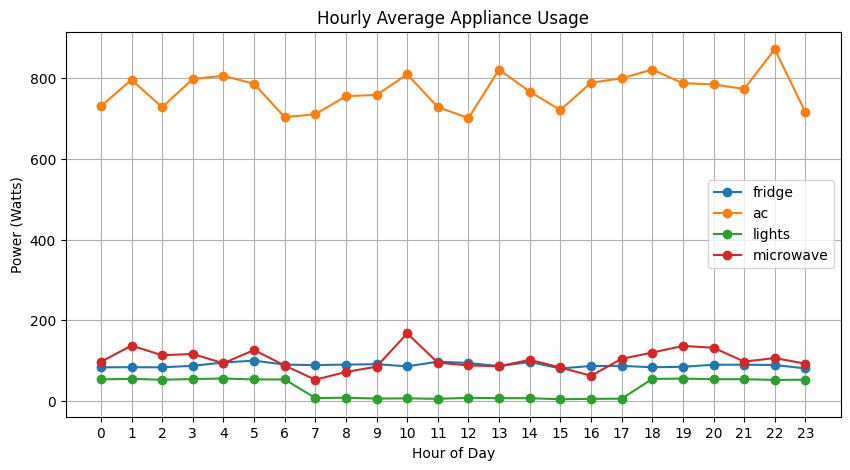

In [5]:
#hourly usage of appliance graph
plt.figure(figsize=(10,5))

for app in appliances:
    plt.plot(hourly_usage.index,
             hourly_usage[app],
             marker='o',
             label=app)

plt.title("Hourly Average Appliance Usage")
plt.xlabel("Hour of Day")
plt.ylabel("Power (Watts)")
plt.xticks(range(0,24))
plt.legend()
plt.grid(True)

plt.show()


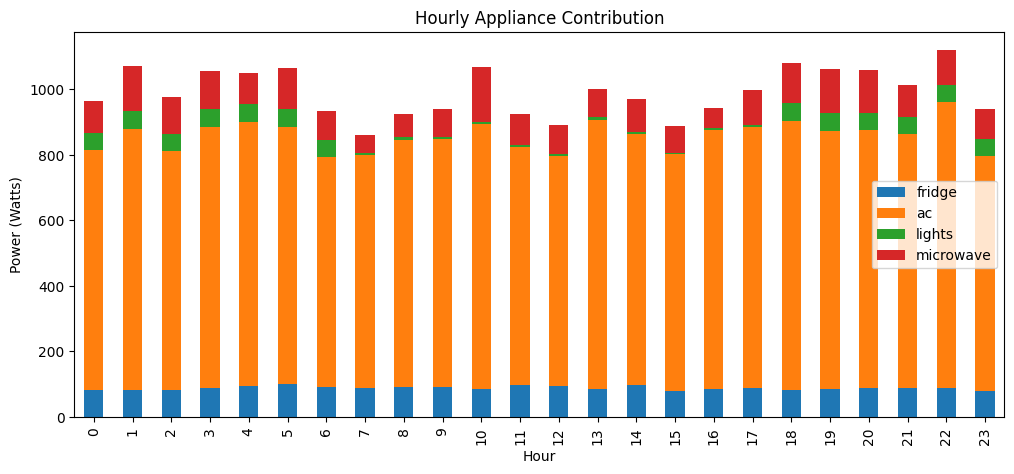

In [6]:
#average of how much they contribute in hours
hourly_usage.plot(
    kind='bar',
    stacked=True,
    figsize=(12,5)
)

plt.title("Hourly Appliance Contribution")
plt.xlabel("Hour")
plt.ylabel("Power (Watts)")
plt.show()


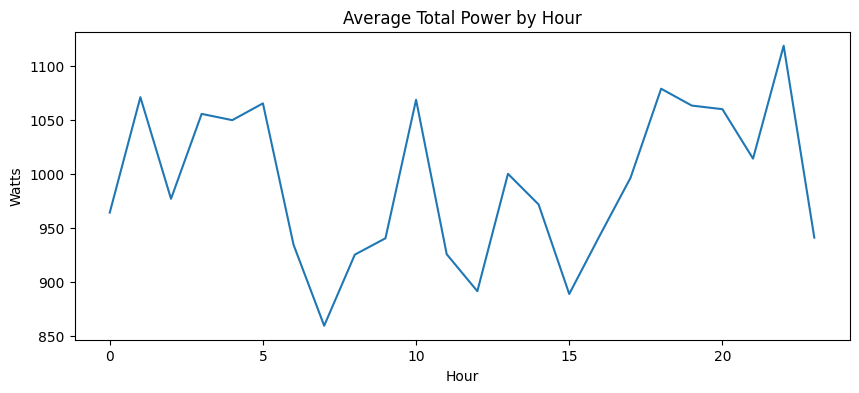

In [8]:
#total power average in hours
df.groupby(df.index.hour)['total_power'].mean().plot(
    title="Average Total Power by Hour",
    xlabel="Hour",
    ylabel="Watts",
    figsize=(10,4)
)
plt.show()


In [9]:
#calculating peak usage hour
peak_hour = df.groupby(df.index.hour)['total_power'].mean().idxmax()
print("Peak usage hour:", peak_hour)


Peak usage hour: 22


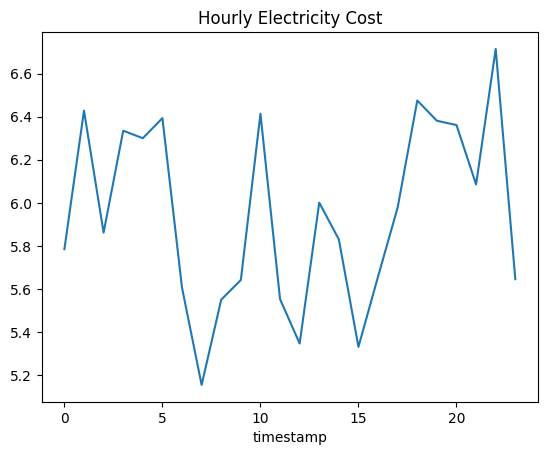

In [11]:
#when we add cost
df['cost'] = df['total_power'] * 0.006 

df.groupby(df.index.hour)['cost'].mean().plot(
    title="Hourly Electricity Cost"
)
plt.show()


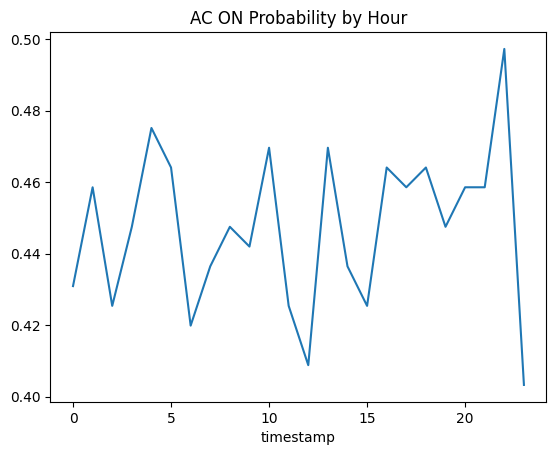

In [13]:
#taking AC switched on(since AC is contributing more)
(df['ac'] > 0).groupby(df.index.hour).mean().plot(
    title="AC ON Probability by Hour"
)
plt.show()


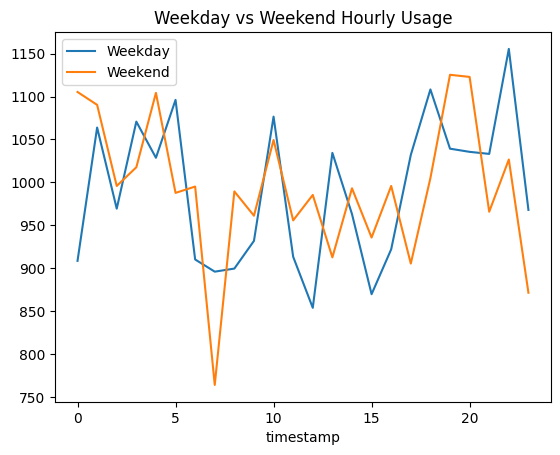

In [14]:
#weekdays and weekens
df['weekday'] = df.index.weekday

weekday = df[df['weekday'] < 5]
weekend = df[df['weekday'] >= 5]

weekday.groupby(weekday.index.hour)['total_power'].mean().plot(label='Weekday')
weekend.groupby(weekend.index.hour)['total_power'].mean().plot(label='Weekend')

plt.legend()
plt.title("Weekday vs Weekend Hourly Usage")
plt.show()


In [3]:
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday   
#0,1,2,...=monday,tuesday,...

In [4]:
weekday_df = df[df['weekday'] < 5]   # Mon–Fri
weekend_df = df[df['weekday'] >= 5]  # Sat–Sun


In [5]:
appliances = ['fridge','ac','lights','microwave']

weekday_hourly = weekday_df.groupby('hour')[appliances].mean()
weekend_hourly = weekend_df.groupby('hour')[appliances].mean()


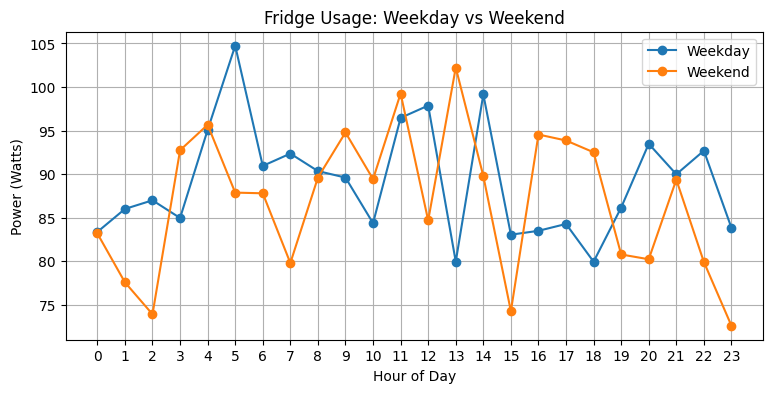

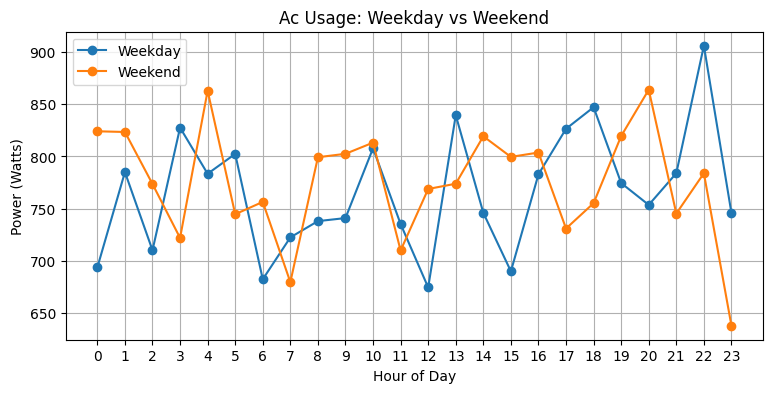

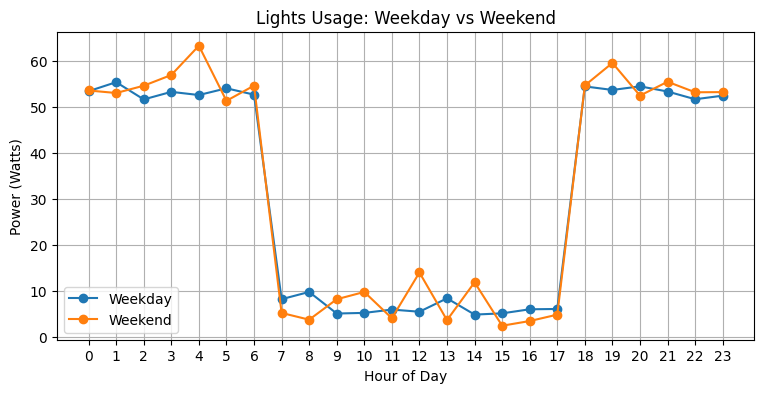

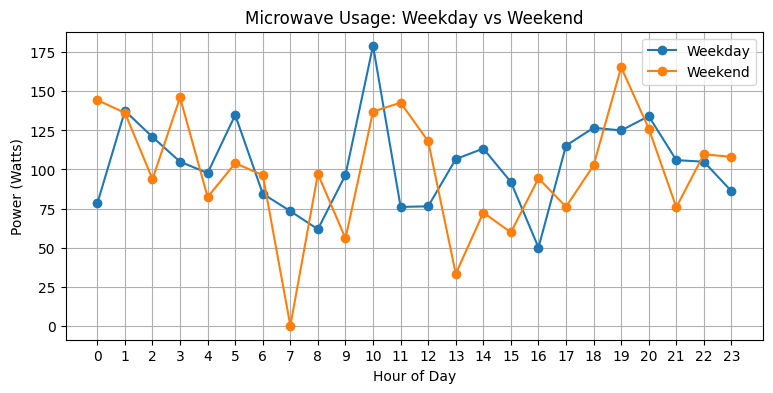

In [6]:
#plotting for each appliance for weekdays and weekends at same hour
for app in appliances:

    plt.figure(figsize=(9,4))

    plt.plot(weekday_hourly.index,
             weekday_hourly[app],
             label='Weekday',
             marker='o')

    plt.plot(weekend_hourly.index,
             weekend_hourly[app],
             label='Weekend',
             marker='o')

    plt.title(f"{app.capitalize()} Usage: Weekday vs Weekend")
    plt.xlabel("Hour of Day")
    plt.ylabel("Power (Watts)")
    plt.xticks(range(0,24))
    plt.legend()
    plt.grid(True)

    plt.show()


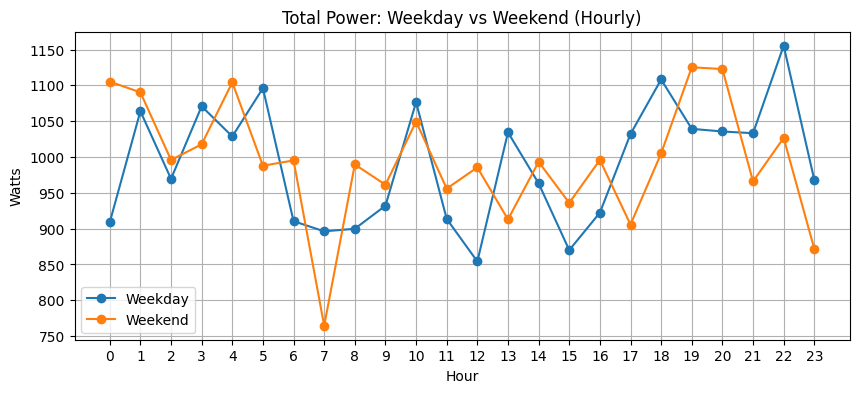

In [7]:
#combined, i.e., all appliances in one graph
weekday_total = weekday_df.groupby('hour')['total_power'].mean()
weekend_total = weekend_df.groupby('hour')['total_power'].mean()

plt.figure(figsize=(10,4))

plt.plot(weekday_total, label='Weekday', marker='o')
plt.plot(weekend_total, label='Weekend', marker='o')

plt.title("Total Power: Weekday vs Weekend (Hourly)")
plt.xlabel("Hour")
plt.ylabel("Watts")
plt.xticks(range(24))
plt.legend()
plt.grid(True)

plt.show()
